load data
plot data

In [1]:
import numpy as np
import pickle
import pandas as pd
import time
from umap import UMAP

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
save_loc = DATA_DIR / 'knn_classifier' 

In [5]:
datasets = [
    'cassins_dtw',
    'cifar10',
    'fmnist',
    'macosko2015',
    'mnist'
]

In [6]:
projection_speeds = pd.concat([pd.read_pickle(save_loc / (dataset + '.pickle')) for dataset in datasets])
projection_speeds[:3]

,method_,dimensions,dataset,1NN_acc,5NN_acc
0,network,2,cassins_dtw,0.991,0.995
1,network,64,cassins_dtw,0.988,0.991
2,autoencoder,2,cassins_dtw,0.989,0.993


In [7]:
# load parametric tsne, vae, ae
for dataset in datasets:
    for n_components in ['2', '64']:
        save_loc =  DATA_DIR / 'knn_classifier' / str(n_components) / (dataset + '.pickle')
        try:
            metric_df = pd.read_pickle(save_loc)
            projection_speeds = pd.concat([projection_speeds, metric_df])
        except FileNotFoundError:
            print(save_loc)
            
        vae_save_loc = (
            DATA_DIR
            / "knn_classifier"
            / 'vae'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(vae_save_loc)
            # display(metric_df)
            projection_speeds = pd.concat([projection_speeds, metric_df])
        except FileNotFoundError:
            print(vae_save_loc)
            
        ae_save_loc = (
            DATA_DIR
            / "knn_classifier"
            / 'ae_only'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(ae_save_loc)
            # display(metric_df)
            projection_speeds = pd.concat([projection_speeds, metric_df])
        except FileNotFoundError:
            print(ae_save_loc)
            
            
        ##### IVIS
        
        ivis_save_loc = (
            DATA_DIR
            / "knn_classifier"
            / 'ivis'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(ivis_save_loc)
            metric_df['method_'] = 'ivis'
            # display(metric_df)
            projection_speeds = pd.concat([projection_speeds, metric_df])
        except FileNotFoundError:
            print(ivis_save_loc)
            
            
        #### scvis
        
        scvis_save_loc = (
            DATA_DIR
            / "knn_classifier"
            / 'scvis'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(scvis_save_loc)
            metric_df['method_'] = 'scvis'
            # display(metric_df)
            projection_speeds = pd.concat([projection_speeds, metric_df])
        except FileNotFoundError:
            print(scvis_save_loc)
            
            
        #### phate
        phate_save_loc = (
            DATA_DIR
            / "knn_classifier"
            / 'phate'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(phate_save_loc)
            metric_df['method_'] = 'phate'
            projection_speeds = pd.concat([projection_speeds, metric_df])
        except FileNotFoundError:
            print(phate_save_loc)
projection_speeds.loc[projection_speeds.dataset == 'cassins', 'dataset'] = 'cassins_dtw'

In [8]:
phate_save_loc

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/data/knn_classifier/phate/train/64/mnist.pickle')

In [9]:
pd.read_pickle(phate_save_loc)

,method_,dimensions,dataset,1NN_acc,5NN_acc
0,phate,64,mnist,0.9634,0.968


In [10]:
projection_speeds = projection_speeds[(((projection_speeds.dimensions == 64) & (projection_speeds.method_ == 'scvis')) == False)]

In [11]:
projection_speeds[projection_speeds.dataset == 'cassins_dtw']

,method_,dimensions,dataset,1NN_acc,5NN_acc
0,network,2,cassins_dtw,0.991,0.995
1,network,64,cassins_dtw,0.988,0.991
2,autoencoder,2,cassins_dtw,0.989,0.993
3,autoencoder,64,cassins_dtw,0.994,0.997
4,umap-learn,2,cassins_dtw,0.986,0.989
5,umap-learn,64,cassins_dtw,0.985,0.986
6,PCA,2,cassins_dtw,0.626,0.691
7,PCA,64,cassins_dtw,0.995,0.992
8,TSNE,2,cassins_dtw,0.988,0.991
0,parametric-tsne,2,cassins_dtw,0.986,0.993


In [12]:
projection_speeds.method_.unique()

array(['network', 'autoencoder', 'umap-learn', 'PCA', 'TSNE',
       'parametric-tsne', 'vae', 'ae_only', 'ivis', 'scvis', 'phate'],
      dtype=object)

In [13]:
projection_speeds.loc[projection_speeds.dataset == 'cassins', 'dataset'] = 'cassins_dtw'
#projection_speeds.loc[projection_speeds.dataset == 'makosco2015', 'dataset'] = 'macoco2015'

In [14]:
import seaborn as sns

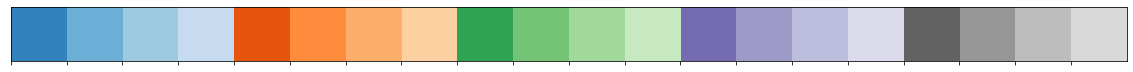

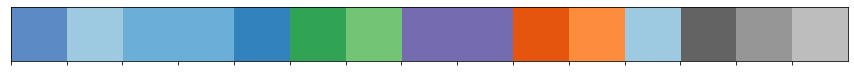

In [15]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "umap-learn": list(np.array(pal20c[3])**4),
    "direct": pal20c[2],
    "AE": pal20c[1],
    "autoencoder": pal20c[1],
    "network": pal20c[0],
    'vae':  pal20c[8], 
    'ae_only':  pal20c[9],
    "pca":  pal20c[12],
    "PCA":  pal20c[12],
    "TSNE": pal20c[4], 
    "parametric-tsne":pal20c[5],
    "network-cpu": pal20c[2],

    
    "scvis": pal20c[16],
    "ivis": pal20c[17],
    "phate": pal20c[18],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

### K=1

In [16]:
hue_list =  ['TSNE', 'parametric-tsne', 'umap-learn', 'network', 'autoencoder',
        'scvis', 'ivis', 'phate', 'vae', 'ae_only', 'PCA']

In [17]:
import matplotlib.pyplot as plt

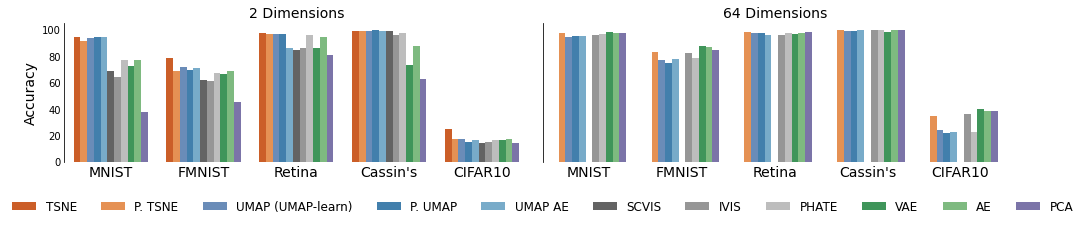

In [18]:
#sns.set(font_scale=1.0)
import matplotlib as mpl
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

median_df = (
    projection_speeds[["method_", "dimensions", "dataset", "1NN_acc"]]
    .groupby(["method_", "dimensions", "dataset"])
    .median()
)
median_df = median_df.T.melt()
median_df["value"]*=100
median_df["error"] = 100 - median_df["value"]
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=hue_list,
    order=["mnist", "fmnist", "macosko2015", "cassins_dtw", "cifar10"],
    col="dimensions",
    height=2.75,
    aspect=2.5,
    data=median_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=False
)
(
    fg.despine(bottom=True)
    .set_xticklabels(["MNIST", "FMNIST", "Retina", "Cassin's", "CIFAR10"])
    .set_axis_labels("", "Accuracy")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u"both", which=u"both", length=0)

if True:
    #leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0, -0.2), ncol = len(hue_list), fontsize=12)

else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
#leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'phate'))[0][0]].set_text('PHATE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'scvis'))[0][0]].set_text('SCVIS')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ivis'))[0][0]].set_text('IVIS')
leg


"""fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')

fg._legend.texts[
    np.where((np.array([i._text for i in fg._legend.texts]) == "network"))[0][0]
].set_text("P. UMAP")
fg._legend.texts[
    np.where((np.array([i._text for i in fg._legend.texts]) == "autoencoder"))[0][0]
].set_text("UMAP AE")"""
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
# fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
# fg._legend.texts[3].set_text("PCA")
# ax.set_ylim([1e-10,1e-3])
# ax.set_yscale('log')
# fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title("2 Dimensions")
ax = fg.axes[0][1]
ax.tick_params(axis=u"both", which=u"both", length=0)

ax.set_title("64 Dimensions")
# ax.set_yscale('log')
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'ae_only'))[0][0]].set_text('AE')
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')

save_fig(FIGURE_DIR/'1nn_acc_results_1_15', save_pdf=True, dpi=300, pad_inches=0.1)

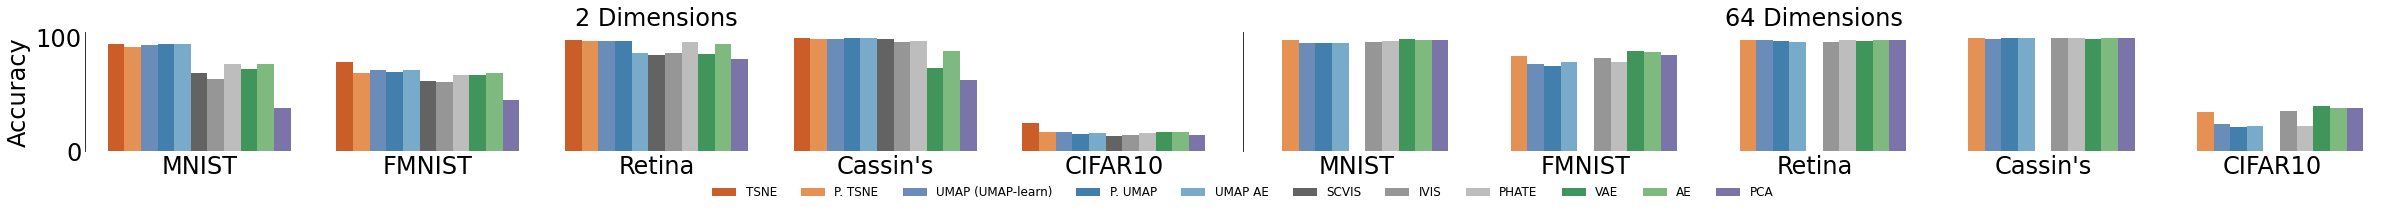

In [19]:
#sns.set(font_scale=1.0)
import matplotlib as mpl
axes = {'labelsize': 24,
        'titlesize': 24,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

median_df = (
    projection_speeds[["method_", "dimensions", "dataset", "1NN_acc"]]
    .groupby(["method_", "dimensions", "dataset"])
    .median()
)
median_df = median_df.T.melt()
median_df["value"]*=100
median_df["error"] = 100 - median_df["value"]
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=hue_list,
    order=["mnist", "fmnist", "macosko2015", "cassins_dtw", "cifar10"],
    col="dimensions",
    height=2.75,
    aspect=6,
    data=median_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=False
)
(
    fg.despine(bottom=True)
    .set_xticklabels(["MNIST", "FMNIST", "Retina", "Cassin's", "CIFAR10"])
    .set_axis_labels("", "Accuracy")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u"both", which=u"both", length=0)

if True:
    #leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0, -0.2), ncol = len(hue_list), fontsize=12)

else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
#leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'phate'))[0][0]].set_text('PHATE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'scvis'))[0][0]].set_text('SCVIS')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ivis'))[0][0]].set_text('IVIS')
leg


"""fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')

fg._legend.texts[
    np.where((np.array([i._text for i in fg._legend.texts]) == "network"))[0][0]
].set_text("P. UMAP")
fg._legend.texts[
    np.where((np.array([i._text for i in fg._legend.texts]) == "autoencoder"))[0][0]
].set_text("UMAP AE")"""
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
# fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
# fg._legend.texts[3].set_text("PCA")
# ax.set_ylim([1e-10,1e-3])
# ax.set_yscale('log')
# fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title("2 Dimensions")
ax = fg.axes[0][1]
ax.tick_params(axis=u"both", which=u"both", length=0)

ax.set_title("64 Dimensions")
# ax.set_yscale('log')
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'ae_only'))[0][0]].set_text('AE')
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')

save_fig(FIGURE_DIR/'1nn_acc_results_1_15_short', save_pdf=True, dpi=300, pad_inches=0.1)

In [20]:
"""fg = sns.catplot(
    x="dataset",
    y="error",
    hue="method_",
    hue_order=["TSNE","parametric-tsne",  "umap-learn", "network", "autoencoder", 'vae', 'ae_only', "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.75, 
    aspect=2.5,
    data=median_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Error")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'ae_only'))[0][0]].set_text('AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')
ax.set_ylim([1e-1,100])
ax.set_yscale('log')
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

#save_fig(FIGURE_DIR/'knn_classifier_results', save_pdf=True, dpi=300, pad_inches=0.1)"""

'fg = sns.catplot(\n    x="dataset",\n    y="error",\n    hue="method_",\n    hue_order=["TSNE","parametric-tsne",  "umap-learn", "network", "autoencoder", \'vae\', \'ae_only\', "PCA"],\n    order = [\'mnist\', \'fmnist\', \'macosko2015\', \'cassins_dtw\', \'cifar10\'],\n    col="dimensions",\n    height=2.75, \n    aspect=2.5,\n    data=median_df,\n    kind="bar",\n    palette=[hue_dict[i] for i in hue_list],\n    #legend=False\n)\n(fg.despine(bottom=True)\n .set_xticklabels([\'MNIST\', \'FMNIST\', \'Retina\', \'Cassin\'s\', \'CIFAR10\'])\n .set_axis_labels("", "Error")\n)\nax = fg.axes[0][0]\nax.tick_params(axis=u\'both\', which=u\'both\',length=0)\nfg._legend._legend_title_box._text.set_text("")\nfg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == \'parametric-tsne\'))[0][0]].set_text(\'P. TSNE\')\nfg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == \'umap-learn\'))[0][0]].set_text(\'UMAP (UMAP-learn)\')\nfg._legend.texts[np.where((np.

### K = 5

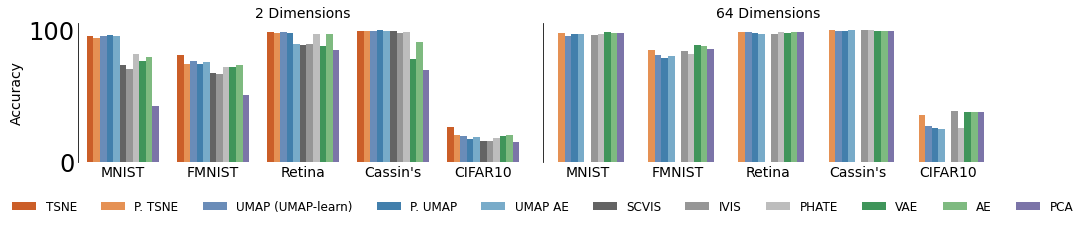

In [21]:
#sns.set(font_scale=1.0)
import matplotlib as mpl
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

median_df = (
    projection_speeds[["method_", "dimensions", "dataset", "5NN_acc"]]
    .groupby(["method_", "dimensions", "dataset"])
    .median()
)
median_df = median_df.T.melt()
median_df["value"]*=100
median_df["error"] = 100 - median_df["value"]
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=hue_list,
    order=["mnist", "fmnist", "macosko2015", "cassins_dtw", "cifar10"],
    col="dimensions",
    height=2.75,
    aspect=2.5,
    data=median_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=False
)
(
    fg.despine(bottom=True)
    .set_xticklabels(["MNIST", "FMNIST", "Retina", "Cassin's", "CIFAR10"])
    .set_axis_labels("", "Accuracy")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u"both", which=u"both", length=0)

if True:
    #leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0, -0.2), ncol = len(hue_list), fontsize=12)

else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
#leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'phate'))[0][0]].set_text('PHATE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'scvis'))[0][0]].set_text('SCVIS')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ivis'))[0][0]].set_text('IVIS')
leg


"""fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')

fg._legend.texts[
    np.where((np.array([i._text for i in fg._legend.texts]) == "network"))[0][0]
].set_text("P. UMAP")
fg._legend.texts[
    np.where((np.array([i._text for i in fg._legend.texts]) == "autoencoder"))[0][0]
].set_text("UMAP AE")"""
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
# fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
# fg._legend.texts[3].set_text("PCA")
# ax.set_ylim([1e-10,1e-3])
# ax.set_yscale('log')
# fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title("2 Dimensions")
ax = fg.axes[0][1]
ax.tick_params(axis=u"both", which=u"both", length=0)

ax.set_title("64 Dimensions")
# ax.set_yscale('log')
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'ae_only'))[0][0]].set_text('AE')
#fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')

save_fig(FIGURE_DIR/'5nn_acc_results_1_15', save_pdf=True, dpi=300, pad_inches=0.1)

In [22]:
"""#sns.set(font_scale=1.0)
import matplotlib as mpl
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

fg = sns.catplot(
    x="dataset",
    y="error",
    hue="method_",
    hue_order=["TSNE", "parametric-tsne", "umap-learn", "network", "autoencoder", 'vae', 'ae_only', "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.75, 
    aspect=2.5,
    data=median_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Error")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'ae_only'))[0][0]].set_text('AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')
ax.set_ylim([1e-1,100])
ax.set_yscale('log')
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

#save_fig(FIGURE_DIR/'knn_classifier_results', save_pdf=True, dpi=300, pad_inches=0.1)"""

'#sns.set(font_scale=1.0)\nimport matplotlib as mpl\naxes = {\'labelsize\': 14,\n        \'titlesize\': 14,}\nmpl.rc(\'axes\', **axes)\nmpl.rcParams[\'xtick.labelsize\'] = 14\n\nfg = sns.catplot(\n    x="dataset",\n    y="error",\n    hue="method_",\n    hue_order=["TSNE", "parametric-tsne", "umap-learn", "network", "autoencoder", \'vae\', \'ae_only\', "PCA"],\n    order = [\'mnist\', \'fmnist\', \'macosko2015\', \'cassins_dtw\', \'cifar10\'],\n    col="dimensions",\n    height=2.75, \n    aspect=2.5,\n    data=median_df,\n    kind="bar",\n    palette=[hue_dict[i] for i in hue_list],\n    #legend=False\n)\n(fg.despine(bottom=True)\n .set_xticklabels([\'MNIST\', \'FMNIST\', \'Retina\', \'Cassin\'s\', \'CIFAR10\'])\n .set_axis_labels("", "Error")\n)\nax = fg.axes[0][0]\nax.tick_params(axis=u\'both\', which=u\'both\',length=0)\nfg._legend._legend_title_box._text.set_text("")\nfg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == \'parametric-tsne\'))[0][0]].set_text(

In [23]:
# 2 AMD EPYC Rome 7252 8-Core 3.1 GHz  processors 

### Make latex table

In [24]:
projection_speeds[:3]

,method_,dimensions,dataset,1NN_acc,5NN_acc
0,network,2,cassins_dtw,0.991,0.995
1,network,64,cassins_dtw,0.988,0.991
2,autoencoder,2,cassins_dtw,0.989,0.993


In [25]:
proj_speed_melt = pd.melt(
    projection_speeds,
    id_vars=["method_", "dimensions", "dataset"],
    value_vars=["1NN_acc", "5NN_acc"],
)
proj_speed_melt.rename(columns={'variable':'metric'}, inplace=True)
proj_speed_melt

,method_,dimensions,dataset,metric,value
0,network,2,cassins_dtw,1NN_acc,0.9910
1,network,64,cassins_dtw,1NN_acc,0.9880
2,autoencoder,2,cassins_dtw,1NN_acc,0.9890
3,autoencoder,64,cassins_dtw,1NN_acc,0.9940
4,umap-learn,2,cassins_dtw,1NN_acc,0.9860
...,...,...,...,...,...
195,parametric-tsne,64,mnist,5NN_acc,0.9734
196,vae,64,mnist,5NN_acc,0.9791
197,ae_only,64,mnist,5NN_acc,0.9758
198,ivis,64,mnist,5NN_acc,0.9614


In [26]:
unique_datasets = list(projection_speeds.dataset.unique())
unique_dims = list(projection_speeds.dimensions.unique())
unique_metric = ['1NN_acc', '5NN_acc']
unique_method = list(projection_speeds.method_.unique())
unique_datasets, unique_dims, unique_metric, unique_method

(['cassins_dtw', 'cifar10', 'fmnist', 'macosko2015', 'mnist'],
 [2, 64],
 ['1NN_acc', '5NN_acc'],
 ['network',
  'autoencoder',
  'umap-learn',
  'PCA',
  'TSNE',
  'parametric-tsne',
  'vae',
  'ae_only',
  'ivis',
  'scvis',
  'phate'])

In [27]:
proj_speed_melt[:3]

,method_,dimensions,dataset,metric,value
0,network,2,cassins_dtw,1NN_acc,0.991
1,network,64,cassins_dtw,1NN_acc,0.988
2,autoencoder,2,cassins_dtw,1NN_acc,0.989


In [28]:
r0, r0n = unique_method, "method_" 
r1, r1n = unique_dims, "dimensions"
c0, c0n = unique_datasets, "dataset" 
c1, c1n = unique_metric, "metric"
row_idx = [
    np.concatenate([list(np.repeat(i, len(r1))) for i in r0]),
    np.concatenate([list(r1) for i in r0]),  
]
row_idx = pd.MultiIndex.from_tuples(list(zip(*row_idx)), names=[r0n, r1n])
col_idx = [
    np.concatenate([list(np.repeat(i, len(c1))) for i in c0]),
    np.concatenate([list(c1) for i in c0]),  

]
col_idx = pd.MultiIndex.from_tuples(list(zip(*col_idx)), names=[c0n, c1n])
results_df = pd.DataFrame(-1*np.ones((len(row_idx), len(col_idx))), index=row_idx, columns=col_idx)
for method_ in unique_method:
    for dataset in unique_datasets:
        for dim in unique_dims:
            for metric in unique_metric:
                val = proj_speed_melt[
                    (proj_speed_melt.dataset == dataset) &
                   (proj_speed_melt.method_ == method_) &
                   (proj_speed_melt.dimensions == dim) & 
                   (proj_speed_melt['metric'] == metric)
                  ]['value']
                if len(val) > 0:
                     results_df.loc[(method_,dim), (dataset, metric)] = round(list(val)[0],3)
results_df

dataset                    cassins_dtw         cifar10          fmnist  \
metric                         1NN_acc 5NN_acc 1NN_acc 5NN_acc 1NN_acc   
method_         dimensions                                               
network         2                0.991   0.995   0.151   0.172   0.694   
                64               0.988   0.991   0.214   0.252   0.743   
autoencoder     2                0.989   0.993   0.159   0.183   0.708   
                64               0.994   0.997   0.222   0.248   0.777   
umap-learn      2                0.986   0.989   0.169   0.194   0.714   
                64               0.985   0.986   0.237   0.269   0.768   
PCA             2                0.626   0.691   0.144   0.150   0.447   
                64               0.995   0.992   0.383   0.377   0.840   
TSNE            2                0.988   0.991   0.246   0.261   0.782   
                64              -1.000  -1.000  -1.000  -1.000  -1.000   
parametric-tsne 2                0.986   0.993   0.168   0.202   0.683   
                64               0.995   0.995   0.343   0.356   0.830   
vae             2                0.730   0.774   0.167   0.194   0.665   
                64               0.980   0.988   0.395   0.378   0.875   
ae_only         2                0.874   0.909   0.170   0.201   0.682   
                64               0.995   0.993   0.379   0.373   0.867   
ivis            2                0.957   0.974   0.144   0.159   0.611   
                64               0.995   0.994   0.357   0.380   0.819   
scvis           2                0.987   0.988   0.138   0.158   0.617   
                64              -1.000  -1.000  -1.000  -1.000  -1.000   
phate           2                0.969   0.984   0.160   0.181   0.665   
                64               0.995   0.998   0.225   0.252   0.782   

dataset                            macosko2015           mnist          
metric                     5NN_acc     1NN_acc 5NN_acc 1NN_acc 5NN_acc  
method_         dimensions                                              
network         2            0.741       0.964   0.976   0.940   0.961  
                64           0.788       0.968   0.975   0.952   0.968  
autoencoder     2            0.756       0.858   0.893   0.940   0.954  
                64           0.803       0.958   0.966   0.948   0.965  
umap-learn      2            0.761       0.967   0.979   0.932   0.954  
                64           0.806       0.972   0.980   0.945   0.954  
PCA             2            0.505       0.809   0.843   0.377   0.420  
                64           0.857       0.976   0.981   0.971   0.973  
TSNE            2            0.804       0.972   0.979   0.941   0.950  
                64          -1.000      -1.000  -1.000  -1.000  -1.000  
parametric-tsne 2            0.736       0.966   0.977   0.912   0.938  
                64           0.848       0.977   0.981   0.970   0.973  
vae             2            0.716       0.854   0.879   0.724   0.765  
                64           0.883       0.967   0.977   0.979   0.979  
ae_only         2            0.734       0.943   0.965   0.765   0.793  
                64           0.876       0.975   0.982   0.975   0.976  
ivis            2            0.662       0.857   0.894   0.637   0.701  
                64           0.836       0.954   0.965   0.959   0.961  
scvis           2            0.673       0.841   0.886   0.688   0.736  
                64          -1.000      -1.000  -1.000  -1.000  -1.000  
phate           2            0.714       0.958   0.968   0.768   0.811  
                64           0.813       0.974   0.979   0.963   0.968

In [29]:
results_latex = results_df.to_latex(
    bold_rows=True, multirow=True, multicolumn=True, multicolumn_format="l"
)
replace_list = [
    ["\\begin{tabular}", "\\begin{table}\n\\begin{tabular}"],
    ["\\end{tabular}", "\\end{tabular}\n\\end{table}"],
    ["-1.000", "-"],
    ["-1.00", "-"],
    ["fmnist", "\\textbf{FMNIST}"],
    ["mnist", "\\textbf{MNIST}"],
    ["macosko2015", "\\textbf{Retina}"],
    ["cassins\_dtw", "\\textbf{Cassin's}"],
    ["cifar10", "\\textbf{CIFAR10}"],
    ["dataset", ""],
    ["metric", ""],
    ["dimensions", ""],
    ["method_", ""],
    ["1NN\_acc", "k=1"],
    ["5NN\_acc", "k=5"],
    
    ["\\end{tabular}",
     "\\end{tabular}\n\caption{KNN Clustering metrics for each dataset"]
]
for i, j in replace_list:
    results_latex = results_latex.replace(i, j)
print(results_latex)

\begin{table}
\begin{tabular}{llrrrrrrrrrr}
\toprule
      & \textbf{} & \multicolumn{2}{l}{\textbf{Cassin's}} & \multicolumn{2}{l}{\textbf{CIFAR10}} & \multicolumn{2}{l}{\textbf{FMNIST}} & \multicolumn{2}{l}{\textbf{Retina}} & \multicolumn{2}{l}{\textbf{MNIST}} \\
      & \textbf{} &     k=1 & k=5 & k=1 & k=5 & k=1 & k=5 &     k=1 & k=5 & k=1 & k=5 \\
\textbf{method\_} & \textbf{} &             &         &         &         &         &         &             &         &         &         \\
\midrule
\multirow{2}{*}{\textbf{network}} & \textbf{2 } &       0.991 &   0.995 &   0.151 &   0.172 &   0.694 &   0.741 &       0.964 &   0.976 &   0.940 &   0.961 \\
      & \textbf{64} &       0.988 &   0.991 &   0.214 &   0.252 &   0.743 &   0.788 &       0.968 &   0.975 &   0.952 &   0.968 \\
\cline{1-12}
\multirow{2}{*}{\textbf{autoencoder}} & \textbf{2 } &       0.989 &   0.993 &   0.159 &   0.183 &   0.708 &   0.756 &       0.858 &   0.893 &   0.940 &   0.954 \\
      & \textbf{64} &       0

In [30]:
col_idx

MultiIndex([('cassins_dtw', '1NN_acc'),
            ('cassins_dtw', '5NN_acc'),
            (    'cifar10', '1NN_acc'),
            (    'cifar10', '5NN_acc'),
            (     'fmnist', '1NN_acc'),
            (     'fmnist', '5NN_acc'),
            ('macosko2015', '1NN_acc'),
            ('macosko2015', '5NN_acc'),
            (      'mnist', '1NN_acc'),
            (      'mnist', '5NN_acc')],
           names=['dataset', 'metric'])

In [31]:
r0, r0n = unique_method, "method_" 
r1, r1n = unique_dims, "dimensions"
c0, c0n = unique_datasets, "dataset" 
c1, c1n = unique_metric, "metric"
row_idx = [list(r0)]
row_idx = pd.MultiIndex.from_tuples(list(zip(*row_idx)), names=[r0n])
col_idx = [
    np.concatenate([list(np.repeat(i, len(c1)*len(r1))) for i in c0]),
    np.concatenate([list(np.repeat(r1, len(c1))) for j in r1 for i in c0]),
    np.concatenate([list(c1) for j in r1  for i in c0]),  

]
col_idx = pd.MultiIndex.from_tuples(list(zip(*col_idx)), names=[c0n, r1n,c1n])
results_df = pd.DataFrame(-1*np.ones((len(row_idx), len(col_idx))), index=row_idx, columns=col_idx)
for method_ in unique_method:
    for dataset in unique_datasets:
        for dim in unique_dims:
            for metric in unique_metric:
                val = proj_speed_melt[
                    (proj_speed_melt.dataset == dataset) &
                   (proj_speed_melt.method_ == method_) &
                   (proj_speed_melt.dimensions == dim) & 
                   (proj_speed_melt['metric'] == metric)
                  ]['value']
                if len(val) > 0:
                     results_df.loc[method_, (dataset, dim ,metric)] = round(list(val)[0],3)
results_df


dataset         cassins_dtw                         cifar10                  \
dimensions               2               64              2               64   
metric              1NN_acc 5NN_acc 1NN_acc 5NN_acc 1NN_acc 5NN_acc 1NN_acc   
method_                                                                       
network               0.991   0.995   0.988   0.991   0.151   0.172   0.214   
autoencoder           0.989   0.993   0.994   0.997   0.159   0.183   0.222   
umap-learn            0.986   0.989   0.985   0.986   0.169   0.194   0.237   
PCA                   0.626   0.691   0.995   0.992   0.144   0.150   0.383   
TSNE                  0.988   0.991  -1.000  -1.000   0.246   0.261  -1.000   
parametric-tsne       0.986   0.993   0.995   0.995   0.168   0.202   0.343   
vae                   0.730   0.774   0.980   0.988   0.167   0.194   0.395   
ae_only               0.874   0.909   0.995   0.993   0.170   0.201   0.379   
ivis                  0.957   0.974   0.995   0.994   0.144   0.159   0.357   
scvis                 0.987   0.988  -1.000  -1.000   0.138   0.158  -1.000   
phate                 0.969   0.984   0.995   0.998   0.160   0.181   0.225   

dataset                  fmnist                         macosko2015          \
dimensions                   2               64                  2            
metric          5NN_acc 1NN_acc 5NN_acc 1NN_acc 5NN_acc     1NN_acc 5NN_acc   
method_                                                                       
network           0.252   0.694   0.741   0.743   0.788       0.964   0.976   
autoencoder       0.248   0.708   0.756   0.777   0.803       0.858   0.893   
umap-learn        0.269   0.714   0.761   0.768   0.806       0.967   0.979   
PCA               0.377   0.447   0.505   0.840   0.857       0.809   0.843   
TSNE             -1.000   0.782   0.804  -1.000  -1.000       0.972   0.979   
parametric-tsne   0.356   0.683   0.736   0.830   0.848       0.966   0.977   
vae               0.378   0.665   0.716   0.875   0.883       0.854   0.879   
ae_only           0.373   0.682   0.734   0.867   0.876       0.943   0.965   
ivis              0.380   0.611   0.662   0.819   0.836       0.857   0.894   
scvis            -1.000   0.617   0.673  -1.000  -1.000       0.841   0.886   
phate             0.252   0.665   0.714   0.782   0.813       0.958   0.968   

dataset                           mnist                          
dimensions           64              2               64          
metric          1NN_acc 5NN_acc 1NN_acc 5NN_acc 1NN_acc 5NN_acc  
method_                                                          
network           0.968   0.975   0.940   0.961   0.952   0.968  
autoencoder       0.958   0.966   0.940   0.954   0.948   0.965  
umap-learn        0.972   0.980   0.932   0.954   0.945   0.954  
PCA               0.976   0.981   0.377   0.420   0.971   0.973  
TSNE             -1.000  -1.000   0.941   0.950  -1.000  -1.000  
parametric-tsne   0.977   0.981   0.912   0.938   0.970   0.973  
vae               0.967   0.977   0.724   0.765   0.979   0.979  
ae_only           0.975   0.982   0.765   0.793   0.975   0.976  
ivis              0.954   0.965   0.637   0.701   0.959   0.961  
scvis            -1.000  -1.000   0.688   0.736  -1.000  -1.000  
phate             0.974   0.979   0.768   0.811   0.963   0.968

In [32]:
results_latex = results_df.to_latex(
    bold_rows=True, multirow=True, multicolumn=True, multicolumn_format="l"
)
replace_list = [
    ["\\begin{tabular}", "\\begin{table}\n\\begin{tabular}"],
    ["\\end{tabular}", "\\end{tabular}\n\\end{table}"],
    ["-1.000", "-"],
    ["-1.00", "-"],
    ["fmnist", "\\textbf{FMNIST}"],
    ["mnist", "\\textbf{MNIST}"],
    ["macosko2015", "\\textbf{Retina}"],
    ["cassins\_dtw", "\\textbf{Cassin's}"],
    ["cifar10", "\\textbf{CIFAR10}"],
    ["dataset", ""],
    ["metric", ""],
    ["dimensions", ""],
    ["method_", ""],
    ["1NN\_acc", "k=1"],
    ["5NN\_acc", "k=5"],
    
    ["\\end{tabular}",
     "\\end{tabular}\n\caption{KNN Clustering metrics for each dataset"]
]
for i, j in replace_list:
    results_latex = results_latex.replace(i, j)
print(results_latex)

\begin{table}
\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
\textbf{} & \multicolumn{4}{l}{\textbf{Cassin's}} & \multicolumn{4}{l}{\textbf{CIFAR10}} & \multicolumn{4}{l}{\textbf{FMNIST}} & \multicolumn{4}{l}{\textbf{Retina}} & \multicolumn{4}{l}{\textbf{MNIST}} \\
\textbf{} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{64} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{64} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{64} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{64} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{64} \\
\textbf{} &     k=1 & k=5 & k=1 & k=5 & k=1 & k=5 & k=1 & k=5 & k=1 & k=5 & k=1 & k=5 &     k=1 & k=5 & k=1 & k=5 & k=1 & k=5 & k=1 & k=5 \\
\textbf{method\_} &             &         &         &         &         &         &         &         &         &         &         &         &             &         &         &         &         &         &         &         \\
\midrule
\textbf{network} &       0.991 &   0.995 &   0.988 &   0.991 &   0.151 &   0.172 &   0.214 &   0